In [60]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [441]:
from src.train import train_model
from src.evaluate import plot_learning_curves, plot_psychometric_curve
from src.analysis import plot_pca_trajectories, decode_choice
from src.data_generator import TwoAFCGenerator
import torch
import os

In [430]:
lr = 1e-4
num_epochs = 10000

In [431]:
trained_model, losses, accuracy = train_model(lr, num_epochs)

100%|██████████| 10000/10000 [03:07<00:00, 53.45it/s]

Time taken: 187.07379412651062
Step 10000/10000 — Loss: 0.1145, Acc: 100.0%


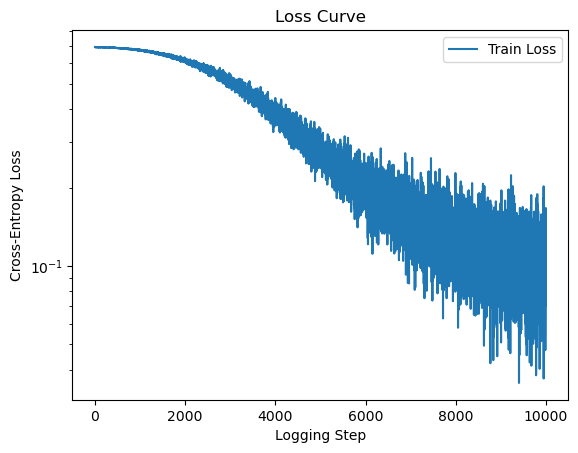

In [432]:
plot_learning_curves(losses, accuracy, val_losses=None, val_accs=None)

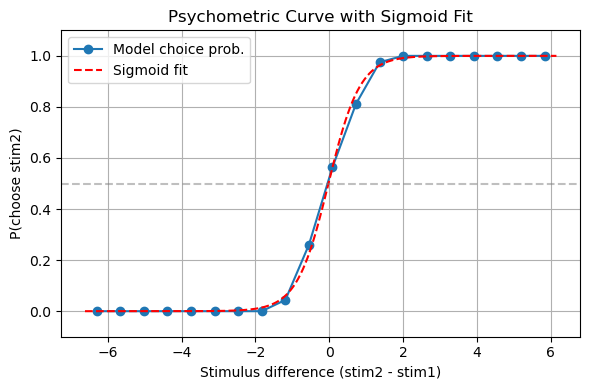

In [438]:
plot_psychometric_curve(trained_model)

In [468]:
current_dir = os.getcwd()

save_dir = os.path.abspath(os.path.join(current_dir, "..", "trained_models"))
os.makedirs(save_dir, exist_ok=True)

save_path = os.path.join(save_dir, "trained_model.pt")
torch.save(trained_model.state_dict(), save_path)
print(f"Model saved to: {save_path}")

Model saved to: C:\Users\shaur\Desktop\RNN_2AFC\trained_models\trained_model.pt


In [ ]:
gen = TwoAFCGenerator(batch_size = 1000,
        fix_dur = 10,
        stim_dur = 20,
        delay_dur = 0,
        decision_dur = 10,
        min_diff= 0,
        max_diff= 0.6,
        noise_level= 0.2)

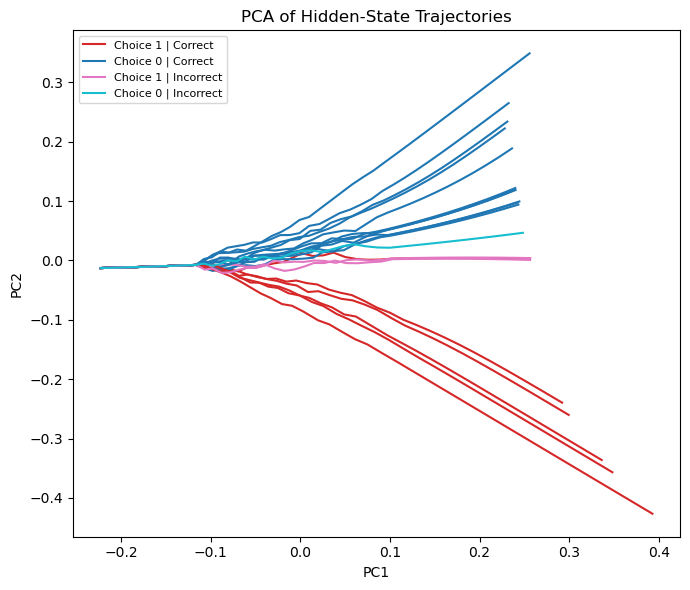

In [465]:
plot_pca_trajectories(trained_model, gen, n_trials=20, n_components=2)

5-fold CV accuracy: 94.0% ± 0.1%


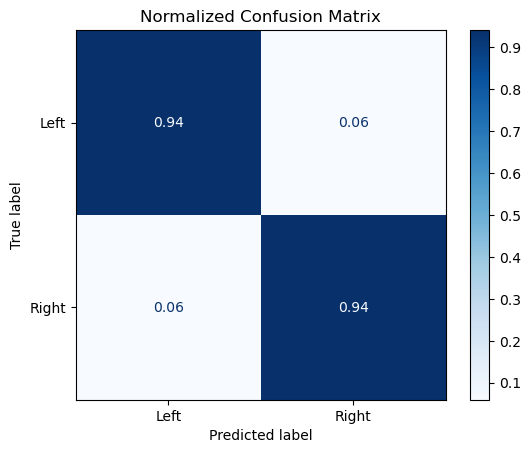

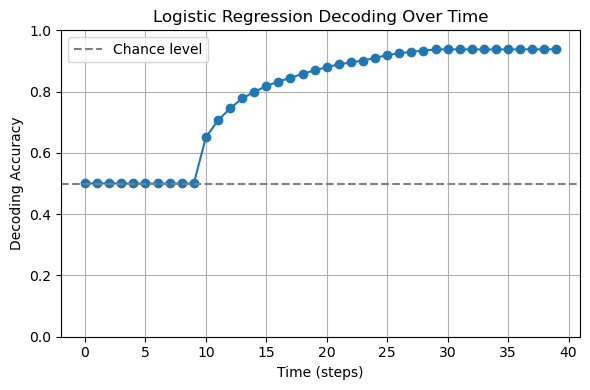

In [466]:
_ = decode_choice(trained_model, gen)